# ***Help Twitter Combat Hate Speech Using NLP and Machine Learning.***

**Twitter Hate Speech Classification**

**DESCRIPTION**

Using NLP and ML, make a model to identify hate speech (racist or sexist tweets) in Twitter.

**Problem Statement:**  

Twitter is the biggest platform where anybody and everybody can have their views heard. Some of these voices spread hate and negativity. Twitter is wary of its platform being used as a medium  to spread hate. 

You are a data scientist at Twitter, and you will help Twitter in identifying the tweets with hate speech and removing them from the platform. You will use NLP techniques, perform specific cleanup for tweets data, and make a robust model.

**Domain: Social Media**

Analysis to be done: Clean up tweets and build a classification model by using NLP techniques, cleanup specific for tweets data, regularization and hyperparameter tuning using stratified k-fold and cross validation to get the best model.

**Content: **

id: identifier number of the tweet

Label: 0 (non-hate) /1 (hate)

Tweet: the text in the tweet

In [ ]:
#general packages for data manipulation
import os
import pandas as pd
import numpy as np

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#consistent sized plot 
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12

#handle the warnings in the code
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

#text preprocessing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import re
#display pandas dataframe columns 
pd.options.display.max_columns = None

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# !wget https://lms.simplilearn.com/user/project/download-attachment?file=1580822543_1570782960_proj2.zip

In [ ]:
!unzip -qq /content/drive/MyDrive/datasets/TwitterHate.zip

replace TwitterHate.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y


**Load the tweets file using read_csv function from Pandas package**

In [ ]:
#load the csv file as a pandas dataframe
#ISO-8859-1
tweet = pd.read_csv('/content/TwitterHate.csv', delimiter=',', engine='python', encoding='utf-8-sig')
tweet.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


**Get the tweets into a list for easy text cleanup and manipulation**

In [ ]:
#get rid of the identifier number of the tweet
tweet.drop('id',axis=1,inplace=True)

In [ ]:
#view one of the tweets randomly 
random = np.random.randint(0,len(tweet))
print(random)
tweet.iloc[random]['tweet']

3293


'@user "i\'ma incredibly dishonesty narcissist constantly slandering others but it\'s not fair when i\'m on the receiving end"  '

In [ ]:
#create a copy of the original data to work with 
df = tweet.copy()

In [ ]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [ ]:
def simplify(text):
    '''Function to handle the diacritics in the text'''
    import unicodedata
    try:
        text = unicode(text, 'utf-8')
    except NameError:
        pass
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
    return str(text)

In [ ]:
df['tweet'] = df['tweet'].apply(simplify)

In [ ]:
type(df['tweet'])

pandas.core.series.Series

**Using regular expressions, remove user handles. These begin with '@’.**

In [ ]:
#test on a sample
sample = "and @user1 i would like you to discuss with @user2 and then with @username3"
pattern = re.compile(r'@\w+')
re.findall(pattern,sample)

['@user1', '@user2', '@username3']

In [ ]:
#remove all the user handles --> strings starting with @
df['tweet'].replace(r'@\w+','',regex=True,inplace=True)

**Using regular expressions, remove URLs.**

In [ ]:
#test on a sample 
sample = "https://www.machinelearing.com prakhar and https://www.simple.com"
pattern = re.compile(r'http\S+')
re.findall(pattern,sample)

['https://www.machinelearing.com', 'https://www.simple.com']

In [ ]:
df['tweet'].replace(r'http\S+','',regex=True,inplace=True)

**Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.**

In [ ]:
#test on a sample text
sample = 'wonderfl :-)  when are you coming for #party'
tweet_tokenize = TweetTokenizer(preserve_case=True)
tweet_tokenize.tokenize(sample)

['wonderfl', ':-)', 'when', 'are', 'you', 'coming', 'for', '#party']

In [ ]:
#tokenize the tweets in the dataframe using TweetTokenizer
tokenizer = TweetTokenizer(preserve_case=True)
df['tweet'] = df['tweet'].apply(tokenizer.tokenize)

In [ ]:
#view the tokenized tweets
df.head(3)

,label,tweet
0,0,"[when, a, father, is, dysfunctional, and, is, ..."
1,0,"[thanks, for, #lyft, credit, i, can't, use, ca..."
2,0,"[bihday, your, majesty]"


**Remove stop words.**

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Remove redundant terms like ‘amp’, ‘rt’, etc.**

In [ ]:
stop_words = stopwords.words('english')

#add additional stop words to be removed from the text
additional_list = ['amp','rt','u',"can't",'ur']

for words in additional_list:
    stop_words.append(words)

In [ ]:
stop_words[-10:]

["weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 'amp',
 'rt',
 'u',
 "can't",
 'ur']

In [ ]:
#remove stop words
def remove_stopwords(text):
    '''Function to remove the stop words from the text corpus'''
    clean_text = [word for word in text if not word in stop_words]
    return clean_text

In [ ]:
#remove the stop words from the tweets
df['tweet'] = df['tweet'].apply(remove_stopwords)

In [ ]:
df['tweet'].head()

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, #lyft, credit, use, cause, offer, whe...
2                                    [bihday, majesty]
3                  [#model, love, take, time, !, !, !]
4                [factsguide, :, society, #motivation]
Name: tweet, dtype: object

In [ ]:
#apply spelling correction on a sample text
from textblob import TextBlob
sample = 'amazng man you did it finallyy'
txtblob = TextBlob(sample)
corrected_text = txtblob.correct()
print(corrected_text)

amazing man you did it finally


In [ ]:
#textblob expect a string to be passed and not a list of strings
from textblob import TextBlob

def spell_check(text):
    '''Function to do spelling correction using '''
    txtblob = TextBlob(text)
    corrected_text = txtblob.correct()
    return corrected_text

In [ ]:
# Remove # symbols while retaining the text
#try tremoving # symbols from a sample text
sample = '#winner #machine i am learning'
pattern = re.compile(r'#')
re.sub(pattern,'',sample)

'winner machine i am learning'

In [ ]:
def remove_hashsymbols(text):
    '''Function to remove the hashtag symbol from the text'''
    pattern = re.compile(r'#')
    text = ' '.join(text)
    clean_text = re.sub(pattern,'',text)
    return tokenizer.tokenize(clean_text)

In [ ]:
df['tweet'] = df['tweet'].apply(remove_hashsymbols)

In [ ]:
df.head(3)

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"


In [ ]:
# Remove single and double length characters
def rem_shortwords(text):
    '''Function to remove the short words of length 1 and 2 characters'''
    '''Arguments: 
       text: string
       returns: string without containing words of length 1 and 2'''
    lengths = [1,2]
    new_text = ' '.join(text)
    for word in text:
        text = [word for word in tokenizer.tokenize(new_text) if not len(word) in lengths]
        
    return new_text

In [ ]:
df['tweet'] = df['tweet'].apply(rem_shortwords)

In [ ]:
df.head(2)

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...


In [ ]:
df['tweet'] = df['tweet'].apply(tokenizer.tokenize)

In [ ]:
df.head(3)

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"


In [ ]:
# Remove digits
def rem_digits(text):
    '''Function to remove the digits from the list of strings'''
    no_digits = []
    for word in text:
        no_digits.append(re.sub(r'\d','',word))
    return ' '.join(no_digits) 

In [ ]:
df['tweet'] = df['tweet'].apply(rem_digits)

In [ ]:
df['tweet'] = df['tweet'].apply(tokenizer.tokenize)

In [ ]:
df.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, take, time, !, !, !]"
4,0,"[factsguide, :, society, motivation]"


In [ ]:
# Remove special characters
def rem_nonalpha(text):
    '''Function to remove the non-alphanumeric characters from the text'''
    text = [word for word in text if word.isalpha()]
    return text

In [ ]:
#remove the non alpha numeric characters from the tweet tokens
df['tweet'] = df['tweet'].apply(rem_nonalpha)

# ***Check out the top terms in the tweets:***

**First, get all the tokenized terms into one large list.**

In [ ]:
# Check out the top terms in the tweets
from collections import Counter
results = Counter()
df['tweet'].apply(results.update)
#print the top 10 most common terms in the tweet 
print(results.most_common(10))

[('love', 2762), ('day', 2319), ('happy', 1679), ('like', 1160), ('time', 1138), ('life', 1124), ('today', 1017), ('new', 994), ('thankful', 947), ('positive', 931)]


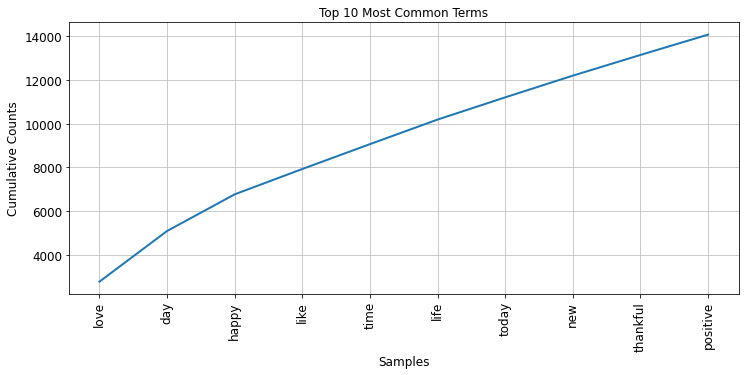

In [ ]:
#plot the cumulative frequency of the top 10 most common tokens 
frequency = nltk.FreqDist(results)
plt.title('Top 10 Most Common Terms')
frequency.plot(10,cumulative=True)
plt.show()

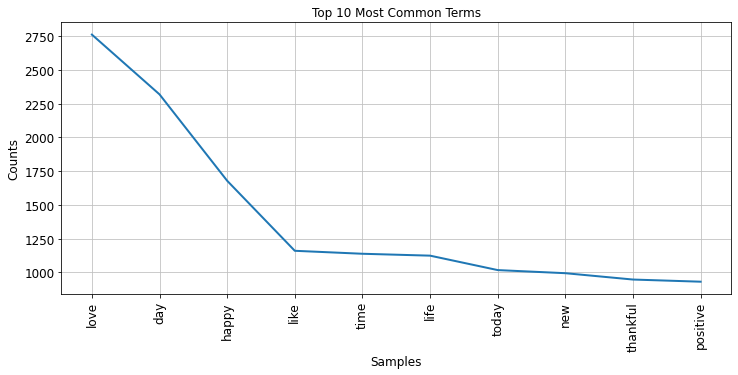

In [ ]:
#plot the frequency of the top 10 most common tokens 
frequency = nltk.FreqDist(results)
plt.title('Top 10 Most Common Terms')
frequency.plot(10,cumulative=False)
plt.show()

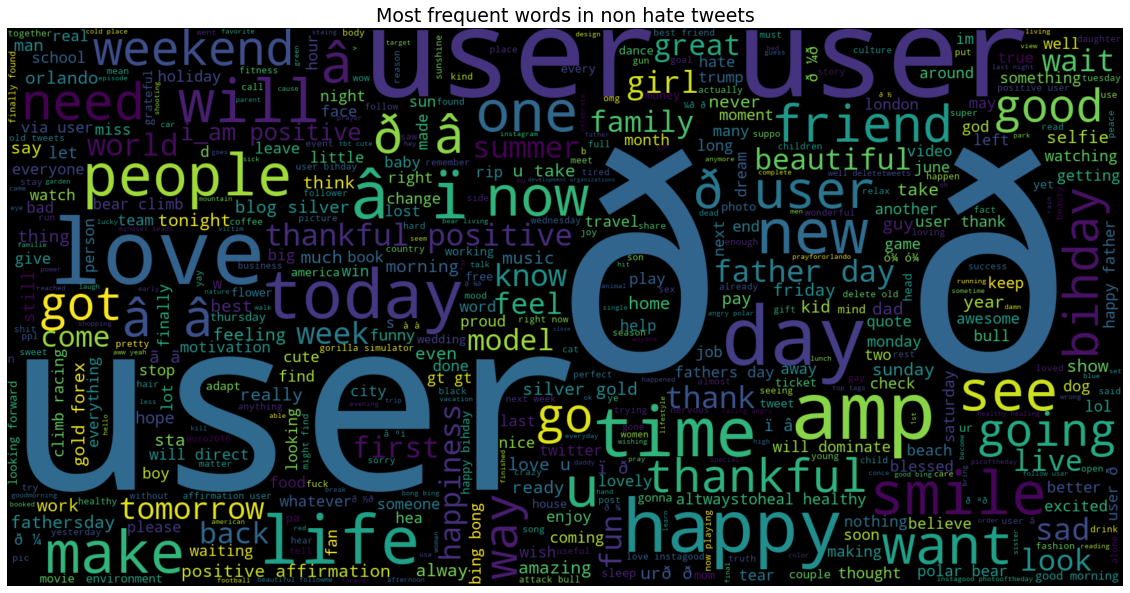

In [ ]:
from wordcloud import WordCloud
tweet_df = tweet
non_hate_tweets = tweet_df[tweet_df.label == 0]
# non_hate_tweets.head()

text = ' '.join([word for word in non_hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non hate tweets', fontsize = 19)
plt.show()

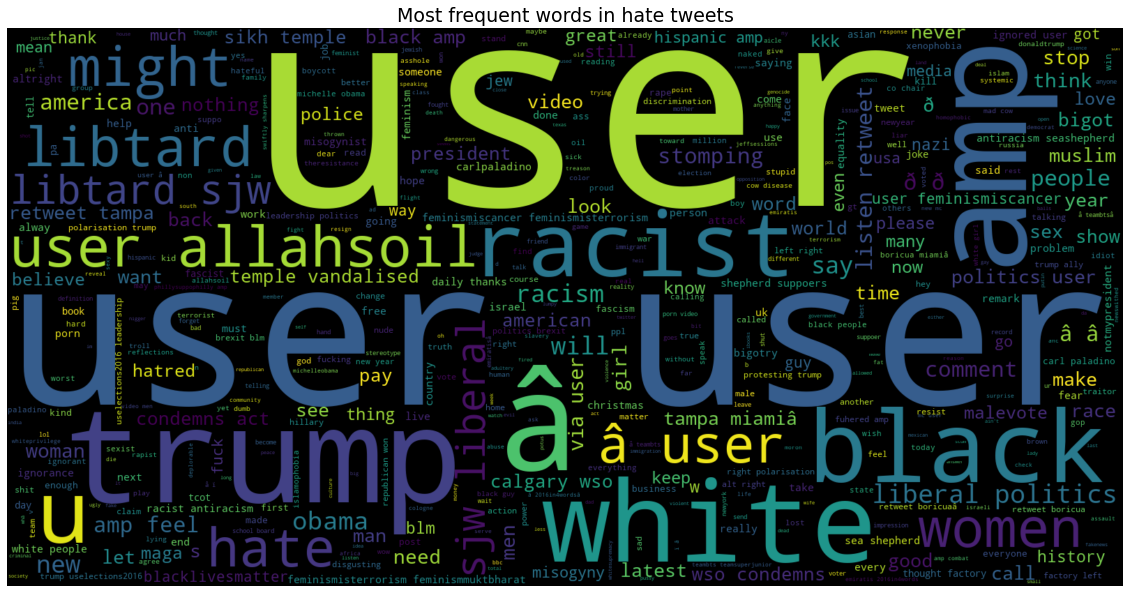

In [ ]:
neg_tweets = tweet_df[tweet_df.label == 1]
# neg_tweets.head()

text = ' '.join([word for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize = 19)
plt.show()

<!-- # ***Data formatting for predictive modeling:*** -->



**Join the tokens back to form strings. This will be required for the vectorizers.**

In [ ]:
df.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, take, time]"
4,0,"[factsguide, society, motivation]"


In [ ]:
#check for the null values
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [ ]:
#join the tokens back to form the string
df['tweet'] = df['tweet'].apply(lambda x: ' '.join(x))

In [ ]:
#check the top rows
df.head(3)

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty


**Assign x and y.**

In [ ]:
X = df['tweet']
y = df['label']

**Perform train_test_split using sklearn.**

In [ ]:
from sklearn.model_selection import train_test_split
seed = 51
test_size = 0.2 #20% of the data in the test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=seed,stratify=df['label'])
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(25569,) (6393,) (25569,) (6393,)


# ***We’ll use TF-IDF values for the terms as a feature to get into a vector space model.***

**Import TF-IDF  vectorizer from sklearn.**

In [ ]:
#import tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

**Instantiate with a maximum of 5000 terms in your vocabulary.**

In [ ]:
#instantiate the vectorizer 
vectorizer = TfidfVectorizer(max_features=5000)

**Fit and apply on the train set.**

In [ ]:
#fit on the training data
X_train = vectorizer.fit_transform(X_train)
#transform the test data
X_test = vectorizer.transform(X_test)

In [ ]:
#check the shape
X_train.shape, X_test.shape

((25569, 5000), (6393, 5000))

# ***Model building: Ordinary Logistic Regression***

**Instantiate Logistic Regression from sklearn with default parameters.**

In [ ]:
#import the models
from sklearn.linear_model import LogisticRegression

**Fit into  the train data.**

In [ ]:
#instantiate the models with default hyper-parameters
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

**Make predictions for the train and the test set.**

In [ ]:
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

**Model evaluation: Accuracy, recall, and f_1 score.**

In [ ]:
#import the metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

**Report the accuracy on the train set.**

In [ ]:
#get the model accuracy on the training
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,train_predictions))

Accuracy Score on training set 0.95569


**Report the recall on the train set: decent, high, or low.**

**Get the f1 score on the train set.**

In [ ]:
print('Classification Report Training set')
print('\n')
print(classification_report(y_train,train_predictions))

Classification Report Training set


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     23775
           1       0.95      0.39      0.55      1794

    accuracy                           0.96     25569
   macro avg       0.95      0.69      0.76     25569
weighted avg       0.96      0.96      0.95     25569



# ***Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s.***

**Adjust the appropriate class in the LogisticRegression model.**

**Check for data balance**

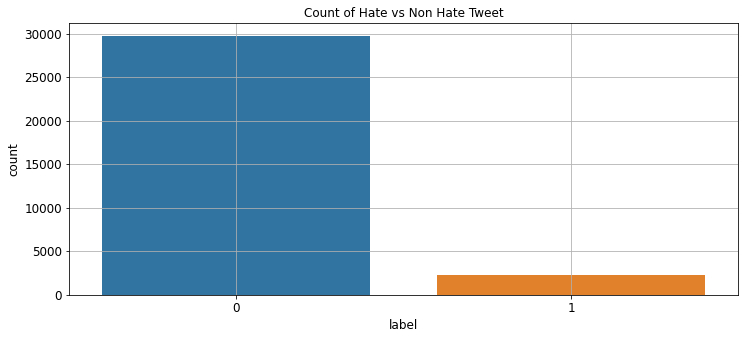

In [ ]:
#plot of the count of hate and non hate tweet
sns.countplot(df['label'])
plt.title('Count of Hate vs Non Hate Tweet')
plt.grid()
plt.show()

In [ ]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

The minority to majority class ratio is 1:13

**Weighted Logistic Regression**

# ***Train again with the adjustment and evaluate.***

**Train the model on the train set.**

In [ ]:
#define the weight of the class labels using inverse ratio
weights = {0:1.0,1:13.0}

#instantiate the logistic regression model and account for the weights to be applied for model coefficients update magnitude
clf = LogisticRegression(solver='lbfgs',class_weight=weights)

#fit and predict
clf.fit(X_train,y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)


**Evaluate the predictions on the train set: accuracy, recall, and f_1 score.**

In [ ]:

#classification report
print('Classification Report Training set')
print('------------------------------------')
print('\n')
print(classification_report(y_train,train_predictions))
print('\n')

print('Classification Report Testing set')
print('------------------------------------')
print('\n')
print(classification_report(y_test,test_predictions))

Classification Report Training set
------------------------------------


              precision    recall  f1-score   support

           0       1.00      0.95      0.97     23775
           1       0.60      0.98      0.74      1794

    accuracy                           0.95     25569
   macro avg       0.80      0.96      0.86     25569
weighted avg       0.97      0.95      0.96     25569



Classification Report Testing set
------------------------------------


              precision    recall  f1-score   support

           0       0.98      0.94      0.96      5945
           1       0.48      0.75      0.58       448

    accuracy                           0.92      6393
   macro avg       0.73      0.84      0.77      6393
weighted avg       0.94      0.92      0.93      6393



# ***Regularization and Hyperparameter tuning:***

**Import GridSearch and StratifiedKFold because of class imbalance.**

In [ ]:
#import the required libraries for grid search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.**

In [ ]:
# define search space
from scipy.stats import loguniform
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l2']
space['C'] = loguniform(1e-5, 100)

#check the search space 
print(space)

{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l2'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f81c4265390>}


**Choose a stratified 4 fold cross-validation scheme.**

In [ ]:
#define the model with balanced class weights
weights = {0:1.0,1:13.0}
clf = LogisticRegression(class_weight=weights)
#define the number of folds 
folds = StratifiedKFold(n_splits=4)
# define search
grid_search = RandomizedSearchCV(estimator=clf,param_distributions=space, n_iter=100, scoring='recall',
                            n_jobs=-1, cv=folds)
#fit grid search on the train data
grid_result = grid_search.fit(X_train,y_train)

**What are the best parameters?**

In [ ]:
#retrieve the best model 
grid_result.best_estimator_

LogisticRegression(C=0.14209090378496086, class_weight={0: 1.0, 1: 13.0},
                   solver='newton-cg')

**Use a balanced class weight while instantiating the logistic regression.**

In [ ]:
#the best model
clf = LogisticRegression(C=0.14233380026835435, class_weight={0: 1.0, 1: 13.0})

# ***Find the parameters with the best recall in cross-validation.***

**Choose ‘recall’ as the metric for scoring**

**Fit into  the train set.**

**Predict and evaluate using the best estimator.**

In [ ]:
#define the model with balanced class weights
weights = {0:1.0,1:13.0}

#instantiate the best model
clf = LogisticRegression(C=0.14233380026835435, class_weight={0: 1.0, 1: 13.0})

#fit and predict
clf.fit(X_train,y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

#classification report
print('Classification Report Training set')
print('------------------------------------')
print('\n')
print(classification_report(y_train,train_predictions))
print('\n')

Classification Report Training set
------------------------------------


              precision    recall  f1-score   support

           0       0.99      0.94      0.97     23775
           1       0.53      0.92      0.67      1794

    accuracy                           0.94     25569
   macro avg       0.76      0.93      0.82     25569
weighted avg       0.96      0.94      0.94     25569





**Use the best estimator from the grid search to make predictions on the test set.**

In [ ]:
print('Classification Report Testing set')
print('------------------------------------')
print('\n')
print(classification_report(y_test,test_predictions))

Classification Report Testing set
------------------------------------


              precision    recall  f1-score   support

           0       0.98      0.93      0.96      5945
           1       0.46      0.77      0.58       448

    accuracy                           0.92      6393
   macro avg       0.72      0.85      0.77      6393
weighted avg       0.95      0.92      0.93      6393



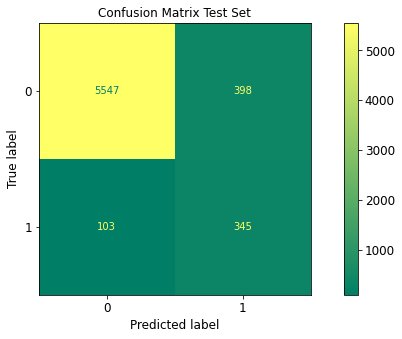

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test,y_test,cmap='summer')
plt.title('Confusion Matrix Test Set')
plt.show()

**What is the recall on the test set for the toxic comments?**

In [ ]:
from sklearn.metrics import recall_score, f1_score

#get the model accuracy on the training and the test set
print('Recall Score on test set %.5f' %recall_score(y_test,test_predictions))

Recall Score on test set 0.77009


**What is the f_1 score?**

In [ ]:
#get the model accuracy on the training and the test set
print('f1 Score on test set %.5f' %f1_score(y_test,test_predictions))

f1 Score on test set 0.57935


# ***END***